# Klasteryzacja

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa5/clustering.csv", header = None)
df

,0,1
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
...,...,...
395,22.423142,50.252807
396,-58.534367,-78.679387
397,36.446549,-11.841887
398,-101.284845,85.096034


### Wizualizacja skupień

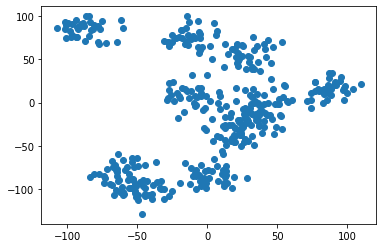

In [146]:
plt.scatter(df.iloc[:,0], df.iloc[:,1])

## Metoda k-średnich

In [147]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(df, n_clusters):
    fig, ax = plt.subplots(2,3, figsize=(16, 10))
    score_df = []
    i = 0
    j = 0
    for n in n_clusters:
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(df)
        y_kmeans = kmeans.predict(df)
        score_df.append(abs(kmeans.score(df)))
        ax[i, j].scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_kmeans, s=30, cmap='viridis')
        ax[i, j].set_title(f"K-means clusters for {n} clusters")
        j = j+1
        if j % 3 == 0:
            j = 0
            i = i+1
    return score_df

            

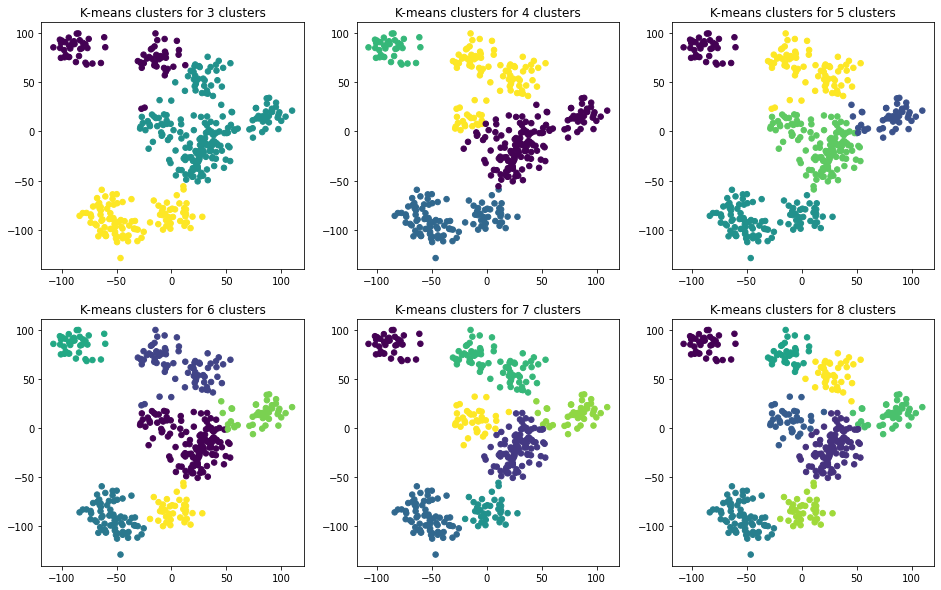

In [148]:
vec = np.arange(3, 9)
scores = plot_kmeans_clusters(df, vec)

Na pierwszy rzut oka trudno wyłonić optymalną liczbę klastrów, zatem wykorzystamy metodę łokcia oraz silhoulette do wyboru optymalnej liczby klastrów.

### Metoda łokcia

Text(0, 0.5, 'Score for K-Means')

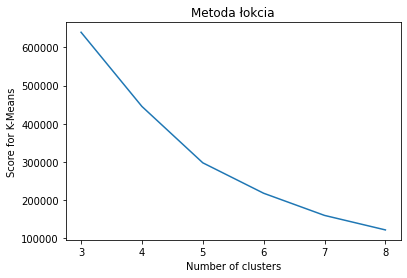

In [149]:
plt.plot(vec, scores)
plt.title('Metoda łokcia')
plt.xlabel('Number of clusters')
plt.ylabel('Score for K-Means')

Metoda łokcia również nie daje jednozancznych wyników

### Sprawdzenie optymalnej liczby klastrów za pomocą metody silhoulette

Text(0, 0.5, 'Score for K-Means')

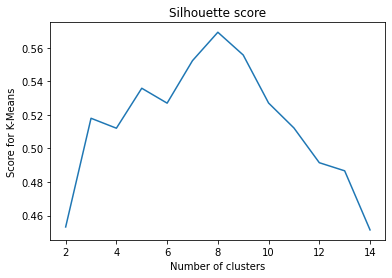

In [150]:
from sklearn.metrics import silhouette_score


def calculate_silhouette_score(method_name, clusters): 
    res = []
    for cluster in clusters:
        kmeans_model = method_name(n_clusters= cluster).fit(df)
        labels = kmeans_model.labels_
        res.append(silhouette_score(df, labels, metric='euclidean'))
    return res

x = np.arange(2, 15)
score = calculate_silhouette_score(KMeans, x)

plt.plot(x, score)
plt.title("Silhouette score")
plt.xlabel('Number of clusters')
plt.ylabel('Score for K-Means')

Według metody Silhouette najbardziej optymalna liczba klastrów w zbiorze to 8.

## Metoda aglomeracyjna

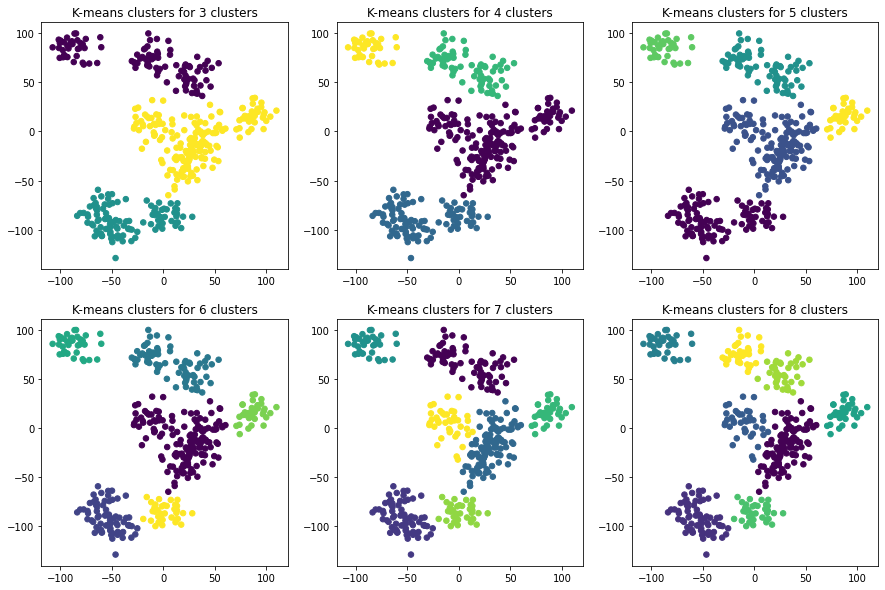

In [151]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

#linkage{‘ward’, ‘complete’, ‘average’, ‘single’}
def plot_agglomerative(df, n_clusters):
    fig, ax = plt.subplots(2,3, figsize=(15, 10))
    db_score = []
    sil_score = []
    i = 0
    j = 0
    for n in n_clusters:
        model = AgglomerativeClustering(n_clusters=n, linkage = 'ward')
        y = model.fit_predict(df)
        db_score.append(davies_bouldin_score(df, y))
        sil_score.append(silhouette_score(df, y, metric='euclidean'))
        ax[i, j].scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, s=30, cmap='viridis')
        ax[i, j].set_title(f"K-means clusters for {n} clusters")
        j = j+1
        if j % 3 == 0:
            j = 0
            i = i+1
    return db_score, sil_score
            
[score, sil_score] = plot_agglomerative(df, np.arange(3, 9))

Klastry wyglądają bardzo podobnie do klastrów otrzymanych metodą k-średnich.


### Indeks Daviesa - Bouldina

Text(0.5, 0, 'Number of clusters')

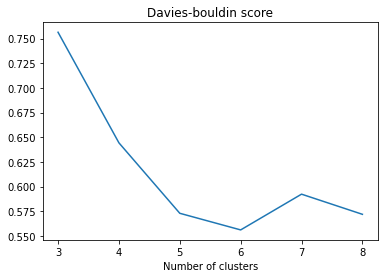

In [152]:
plt.plot(vec, score)
plt.title("Davies-bouldin score")
plt.xlabel('Number of clusters')

### Indeks silhouette - dla porównania

Text(0.5, 0, 'Number of clusters')

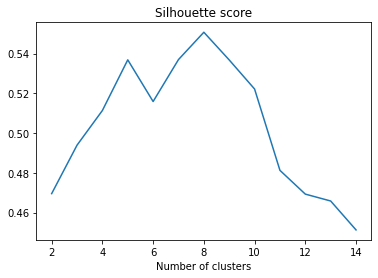

In [153]:
score = calculate_silhouette_score(AgglomerativeClustering, x)
plt.plot(x, score)
plt.title('Silhouette score')
plt.xlabel('Number of clusters')

## Wnioski:
- Na podstawie rysunku maksymalna liczba klastrów, którą warto rozważać, to **8**
- Zgodnie z metryką silhouette optymalna liczba klastrów to **8** zarówno dla metody `K-means` oraz `AgglomerativeClustering`
- Wykorzystanie metody łokcia do wyznaczenia optymalnej liczby klastrów dla metody `K-means` nie daje jednoznacznej odpowiedzi (optymalny przedział: ok. 4-6 klastrów)
- Wykorzystanie indeksu Davida Bouldina dla metody `AgglomerativeClustering` wskazuje 6 jako najbardziej optymalną liczbę klastrów

##### Reasumując, najbardziej optymalny wydaje się podział zbioru na 8 klastrów